In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df_exchange_earnings = pd.read_csv("Estimates of Foreign Exchange Earnings  FEEs  in Rs Crore from Tourism in India.csv")
df_arrivals_by_region = pd.read_csv("Foreign Tourist Arrivals in India from Different Regions.csv")
df_airport_evisa = pd.read_csv("Major Airport wise arrival of foreign tourists availing e Visa during 2021.csv")
df_world_vs_india_arrivals = pd.read_csv("Major Countries of the World and India in International Tourist Arrivals.csv")
df_monthly_exchange = pd.read_csv("Month wise estimates of Foreign Exchange Earnings  FEEs  In Rs Crore from Tourism in India.csv")
df_monthly_indian_departures = pd.read_csv("Month wise Indian Nationals Departures.csv")
df_domestic_visits = pd.read_csv("Number of Domestic Tourist Visits to all StatesUTs in India.csv")
df_ftas_fees_2021 = pd.read_csv("oreign Tourist Arrivals FTAs and Foreign Exchange Earnings FEE  in India during 2021 with comparative figures.csv")
df_departure_purpose = pd.read_csv("Purpose wise Indian Nationals  Departure IND.csv")
df_top10_domestic = pd.read_csv("Share of Top 10 StatesUTs of India in Number of Domestic Tourist Visits.csv")
df_top10_foreign = pd.read_csv("Share of Top 10 StatesUTs of India in Number of Foreign Tourist Visits.csv")
df_statewise_share = pd.read_csv("Shares and Rank of Different StatesUTs in Domestic and ForeignTourist Visits.csv")
df_top10_departure_countries = pd.read_csv("Top 10 destination country for Indian Nationals Departures  IND.csv")
df_visitor_profiling = pd.read_csv("Visitor Profiling Tables.csv")
df_visitor_survey = pd.read_csv("Visitor Survey at Tourism Destinations.csv")

# P R O J E C T / P R O B L E M    S T A T E M E N T S

# O B J E C T I V  E S    [A T L E A S T   4   O B J E C T I V E S]
# H O W   Y O U   S O L V E D   T H E   O B J E C T I V E S



In [ ]:
df = df_exchange_earnings
# View the structure
print("Columns:", df.columns)
print("\nFirst 5 rows:")
df.head()


Columns: Index(['Country', 'srcYear',
       'Amount of estimated Foreign Exchange Earnings (FEEs) from Tourism in India',
       'YearCode', 'Year'],
      dtype='object')

First 5 rows:


,Country,srcYear,Amount of estimated Foreign Exchange Earnings (FEEs) from Tourism in India,YearCode,Year
0,India,2007,44362,2007,"Calendar Year (Jan - Dec), 2007"
1,India,2017,177874,2017,"Calendar Year (Jan - Dec), 2017"
2,India,2013,107563,2013,"Calendar Year (Jan - Dec), 2013"
3,India,2003,20729,2003,"Calendar Year (Jan - Dec), 2003"
4,India,2020,50136,2020,"Calendar Year (Jan - Dec), 2020"


In [19]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Country                                                                       0
srcYear                                                                       0
Amount of estimated Foreign Exchange Earnings (FEEs) from Tourism in India    0
YearCode                                                                      0
Year                                                                          0
dtype: int64


In [20]:
# Convert 'Year' column to string (if not already)
df['Year'] = df['Year'].astype(str)

['Country', 'srcYear', 'FEE_INR', 'YearCode', 'Year', 'FEE_INR_Growth (%)']


C:\Users\Sushil Pandit\AppData\Local\Temp\ipykernel_19048\4173053573.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


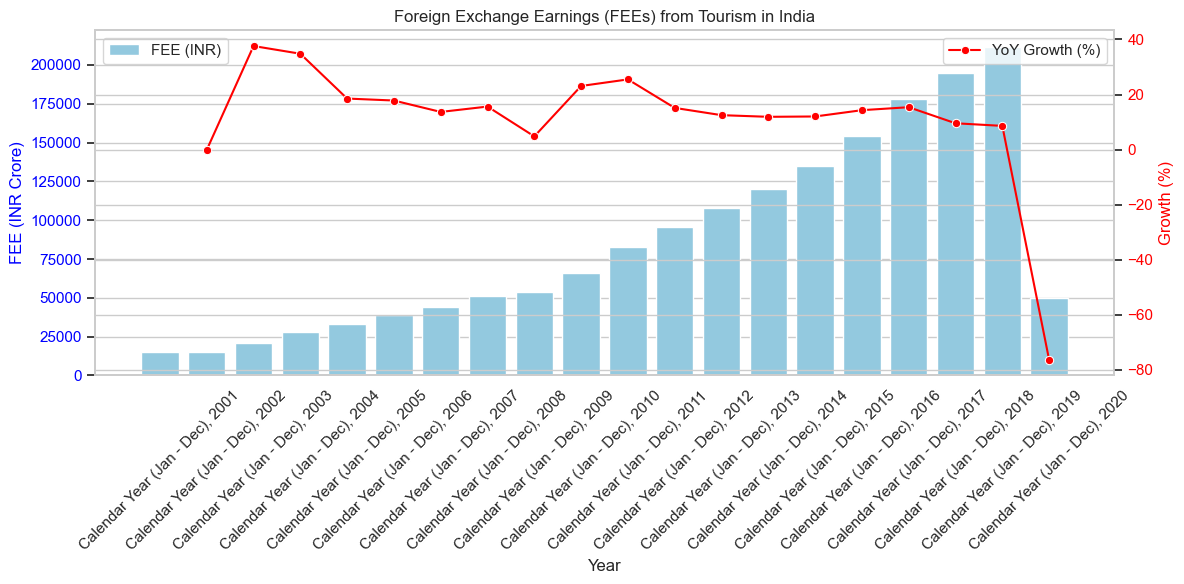

In [26]:

print(df.columns.tolist())# to know the coloumns name, will need in next step while writing sns.barplot


# Clean and process the data
df.columns = df.columns.str.strip()
df = df[df['Country'] == 'India'].copy()
df = df.sort_values("Year")

# Rename column for clarity
df.rename(columns={
    "Amount of estimated Foreign Exchange Earnings (FEEs) from Tourism in India": "FEE_INR"
}, inplace=True)

# Calculate year-on-year growth
df["FEE_INR_Growth (%)"] = df["FEE_INR"].pct_change() * 100

# Plot using seaborn/matplotlib
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create barplot for FEE
ax1 = sns.barplot(data=df, x="Year", y="FEE_INR", color="skyblue", label="FEE (INR)")
ax1.set_ylabel("FEE (INR Crore)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_title("Foreign Exchange Earnings (FEEs) from Tourism in India")

# Create secondary axis for growth percentage
ax2 = ax1.twinx()
sns.lineplot(data=df, x="Year", y="FEE_INR_Growth (%)", color="red", marker="o", ax=ax2, label="YoY Growth (%)")
ax2.set_ylabel("Growth (%)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Rotate x labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Add legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

Foreign Tourist Arrivals in India from Different Regions

In [27]:
fta_df=df_arrivals_by_region

# Clean column names
fta_df.columns = fta_df.columns.str.strip()

# Filter for India only
fta_df = fta_df[fta_df["Country"] == "India"].copy()

# Rename columns for clarity
fta_df.rename(columns={
    "srcYear": "Year",
    "Region or Country name": "Region",
    "Number of Foreign Tourist Arrivals (FTAs) in India from different regions of the world": "FTAs"
}, inplace=True)

# Use numeric year column
fta_df["Year"] = fta_df["YearCode"].astype(int)
fta_df["FTAs"] = pd.to_numeric(fta_df["FTAs"], errors='coerce')

# Summarize total FTAs by Region
region_summary = fta_df.groupby("Region")["FTAs"].sum().sort_values(ascending=False).reset_index()

C:\Users\Sushil Pandit\AppData\Local\Temp\ipykernel_19048\3040326863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_summary, x="FTAs", y="Region", palette="viridis")


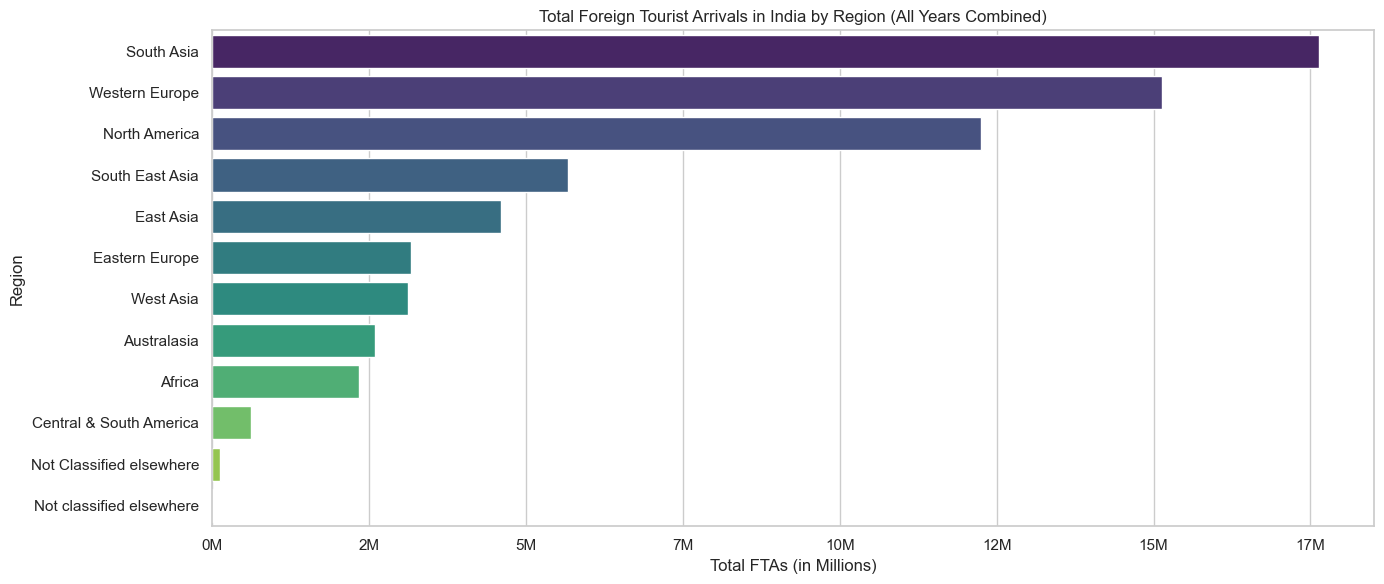

In [ ]:
# 🔹 Plot 1: Total FTAs by Region (Bar Chart)
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=region_summary, x="FTAs", y="Region", palette="viridis")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))
plt.title("Total Foreign Tourist Arrivals in India by Region (All Years Combined)")
plt.xlabel("Total FTAs (in Millions)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

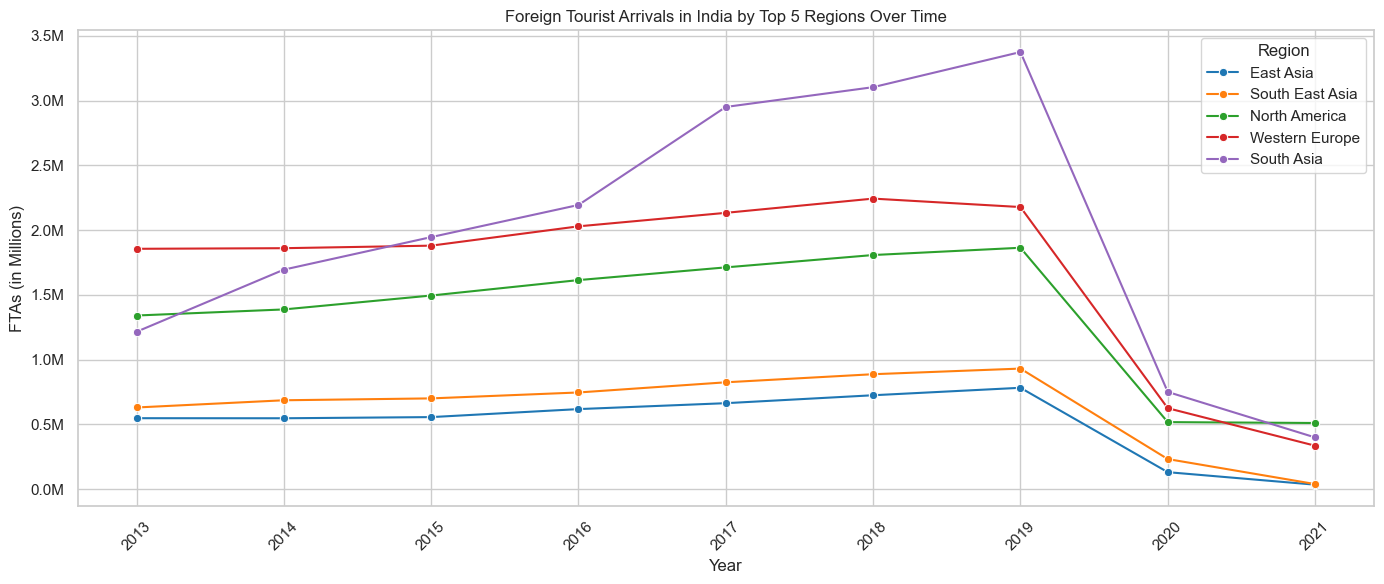

In [ ]:
# 🔹 Top 5 Regions for further analysis
top_regions = region_summary.head(5)["Region"].tolist()
top_regions_df = fta_df[fta_df["Region"].isin(top_regions)]


# Fix any duplicate columns
top_regions_df = top_regions_df.loc[:, ~top_regions_df.columns.duplicated()]

plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=top_regions_df, x="Year", y="FTAs", hue="Region", marker="o", palette="tab10")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

plt.title("Foreign Tourist Arrivals in India by Top 5 Regions Over Time")
plt.ylabel("FTAs (in Millions)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

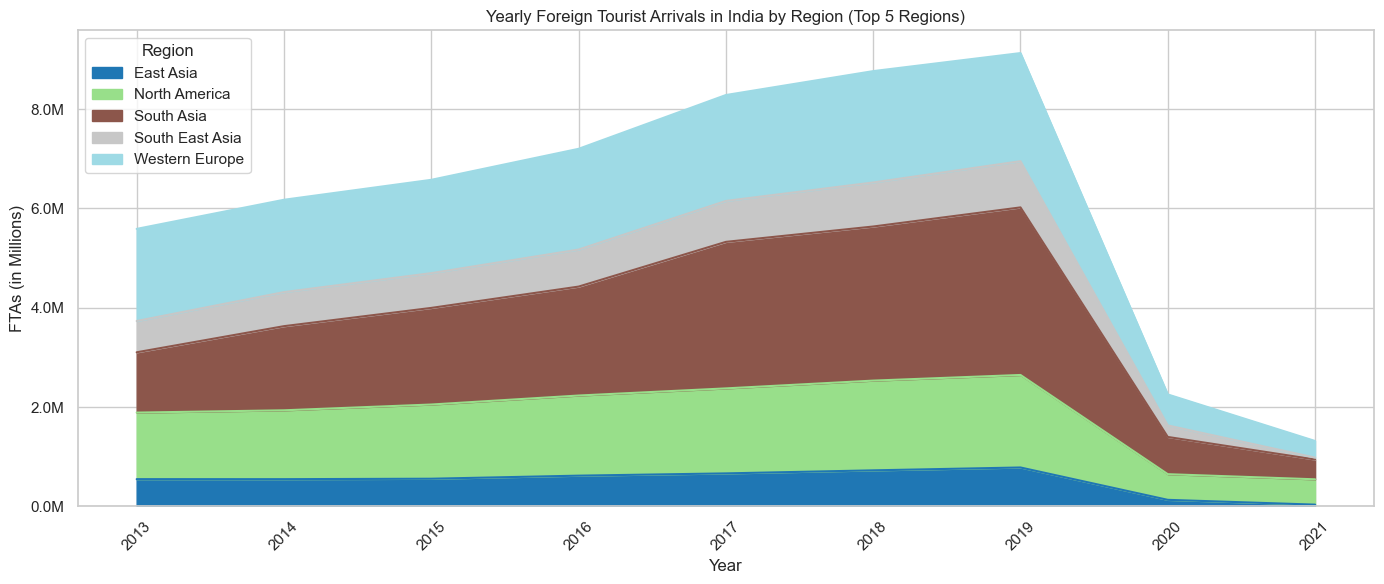

In [ ]:
# 🔹 Plot 3: Stacked Area Chart

area_df = top_regions_df.pivot_table(index="Year", columns="Region", values="FTAs", aggfunc="sum").fillna(0)

fig, ax = plt.subplots(figsize=(14, 6))
area_df.plot(kind="area", stacked=True, colormap="tab20", ax=ax)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

plt.title("Yearly Foreign Tourist Arrivals in India by Region (Top 5 Regions)")
plt.ylabel("FTAs (in Millions)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title="Region", loc="upper left")
plt.tight_layout()
plt.show()

📊 Plot 1: Total FTAs by Region (Bar Chart)
What it shows:
This bar chart displays the total number of Foreign Tourist Arrivals (FTAs) in India from each region, accumulated over all the years in the dataset.

Key insights:

Regions like South Asia, Western Europe, and North America are top contributors to India's tourism sector.

The bar heights directly represent the volume of tourists — higher bars indicate greater total tourist inflow over time.

📈 Plot 2: FTAs Over Time by Top 5 Regions (Line Chart)
What it shows:
This line chart presents the yearly trend of FTAs in India from the top 5 regions (based on total arrivals). Each line represents one region and shows how the number of tourists has changed year by year.

Key insights:

You can observe growth patterns, stability, or drops in arrivals from specific regions.

For example, steady growth in South Asia, consistent performance from Western Europe, and potential dips around global events like the COVID-19 pandemic.

This graph is useful to track tourism dynamics and how international travel trends shift over time.

🌍 Plot 3: Stacked Area Chart – Regional FTAs Over Time
What it shows:
This stacked area chart gives a cumulative view of FTAs over the years from the top 5 regions, showing both the individual contribution of each region and the total tourist arrivals per year.

Key insights:

The height of the stack at each point along the x-axis shows the total FTAs that year.

The colored layers help you understand how much each region contributes to the total — for example, the widening of the South Asia layer indicates its growing dominance in recent years.

You can easily spot years of significant growth or decline in overall tourism.



Major Airport wise arrival of foreign tourists availing e Visa during 2021

['Country', 'Year', 'Airport', 'eVisa_Tourists', 'YearCode', 'Year']


C:\Users\Sushil Pandit\AppData\Local\Temp\ipykernel_19048\2071285293.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_visa["Year"] = pd.to_numeric(df_apt_visa["Year"], errors='coerce')


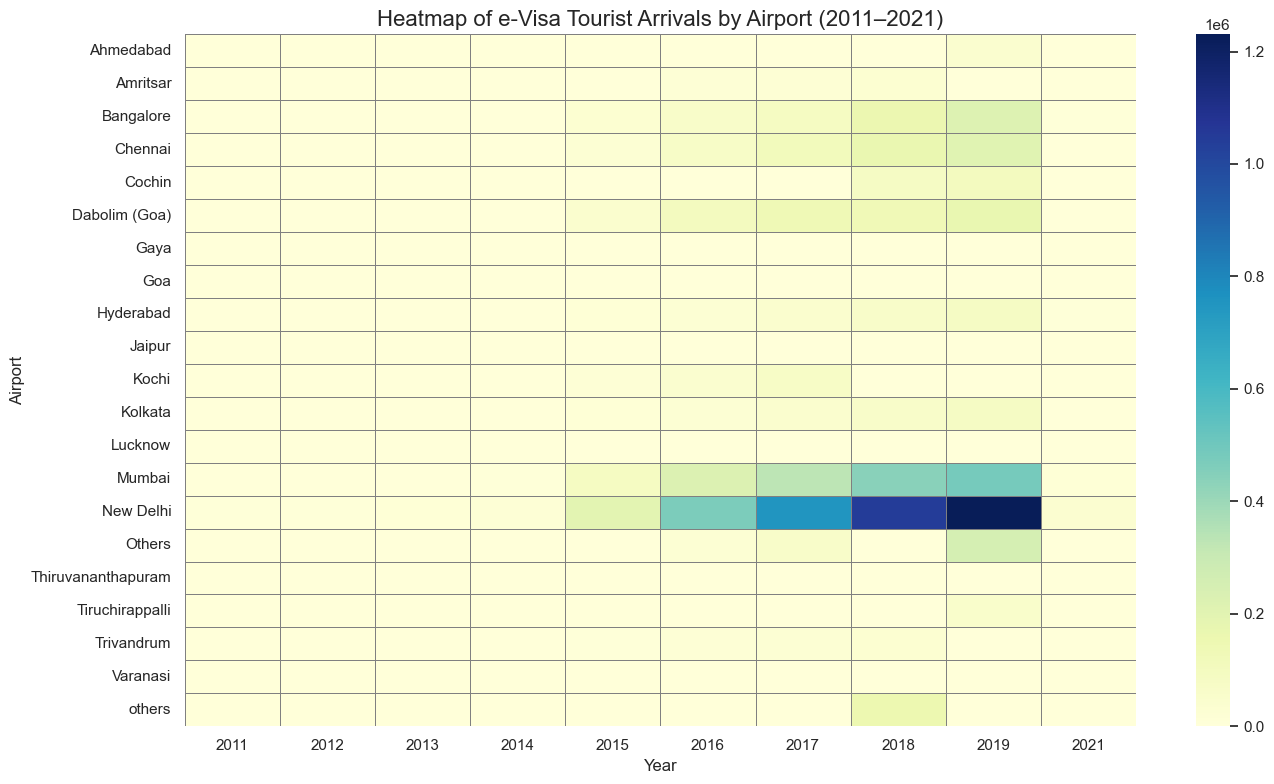

C:\Users\Sushil Pandit\AppData\Local\Temp\ipykernel_19048\2071285293.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top2021, x="eVisa_Tourists", y="Airport", palette="crest")


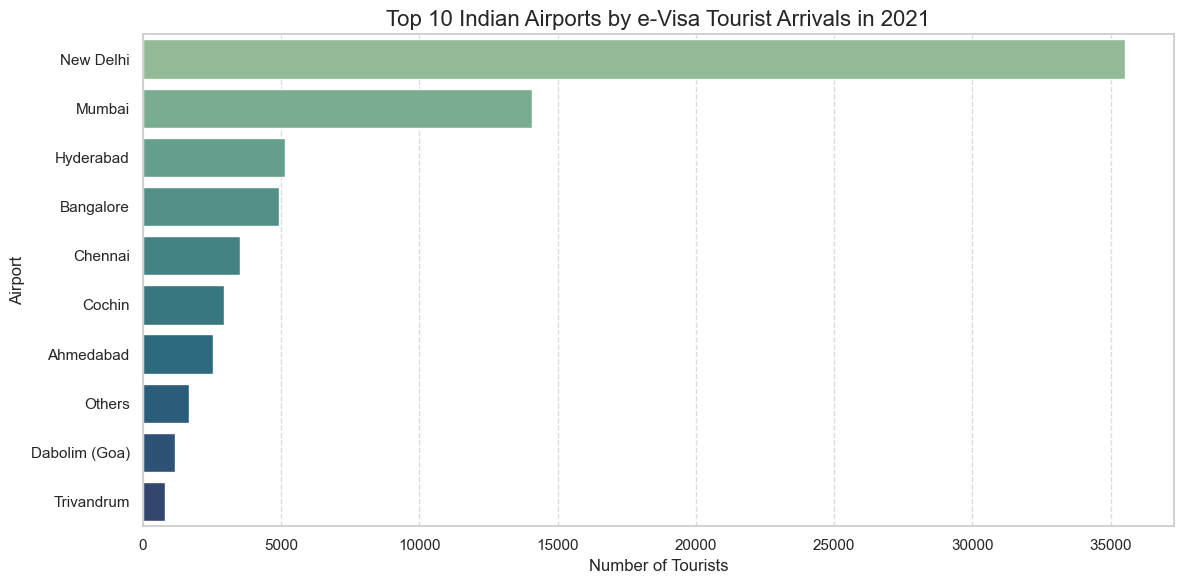

In [ ]:
df_apt_visa=df_airport_evisa
df_apt_visa.columns = df_apt_visa.columns.str.strip()

print(df_apt_visa.columns.tolist())

# Rename for clarity
df_apt_visa.rename(columns={
    "srcYear": "Year",
    "Name of the Airport": "Airport",
    "Airport wise arrival of foreign tourists who are availing e-Visa": "eVisa_Tourists"
}, inplace=True)
# Check for duplicate 'Year' columns and drop one
df_apt_visa = df_apt_visa.loc[:, ~df_apt_visa.columns.duplicated()]

# Now safely convert 'Year' column
df_apt_visa["Year"] = pd.to_numeric(df_apt_visa["Year"], errors='coerce')
df_apt_visa = df_apt_visa.dropna(subset=["Year"])
df_apt_visa["Year"] = df_apt_visa["Year"].astype(int)

# Ensure 'Year' is numeric, coerce errors to NaN and drop them
df_apt_visa["Year"] = pd.to_numeric(df_apt_visa["Year"], errors='coerce')
df_apt_visa = df_apt_visa.dropna(subset=["Year"])
df_apt_visa["Year"] = df_apt_visa["Year"].astype(int)


# Chart 1: Heatmap of e-Visa Arrivals Over Time

pivot_df = df_apt_visa.pivot_table(index="Airport", columns="Year", values="eVisa_Tourists", aggfunc="sum").fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap="YlGnBu", linewidths=0.5, linecolor='gray', annot=False, fmt=".0f")
plt.title("Heatmap of e-Visa Tourist Arrivals by Airport (2011–2021)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Airport")
plt.tight_layout()
plt.show()

# Chart 2: Top Airports in 2021 (Horizontal Bar)

top2021 = df_apt_visa[df_apt_visa["Year"] == 2021].sort_values("eVisa_Tourists", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top2021, x="eVisa_Tourists", y="Airport", palette="crest")
plt.title("Top 10 Indian Airports by e-Visa Tourist Arrivals in 2021", fontsize=16)
plt.xlabel("Number of Tourists")
plt.ylabel("Airport")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Major Countries of the World and India in International Tourist Arrivals

Month wise estimates of Foreign Exchange Earnings  FEEs  In Rs Crore from Tourism in India

C:\Users\Sushil Pandit\AppData\Local\Temp\ipykernel_19048\3716203122.py:38: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sushil Pandit\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


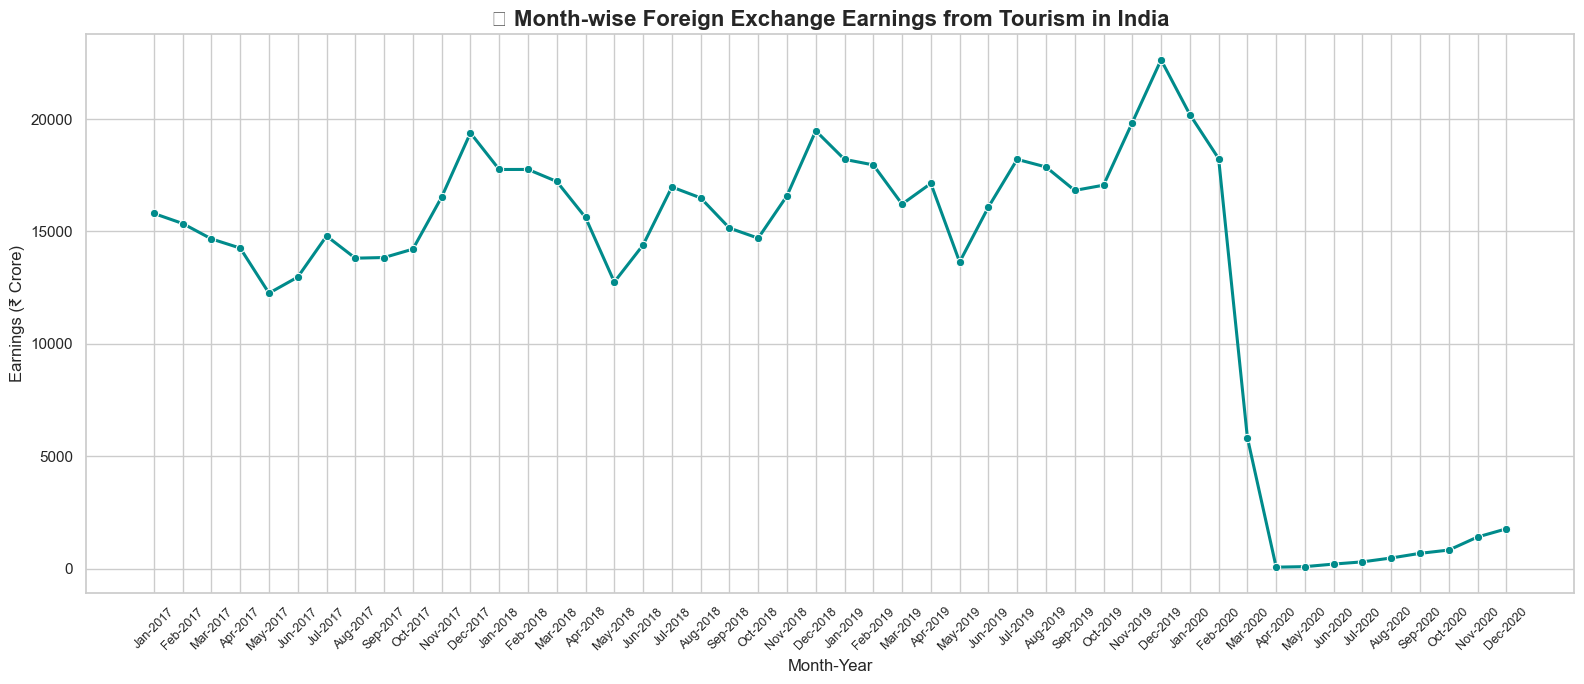

C:\Users\Sushil Pandit\AppData\Local\Temp\ipykernel_19048\3716203122.py:71: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sushil Pandit\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


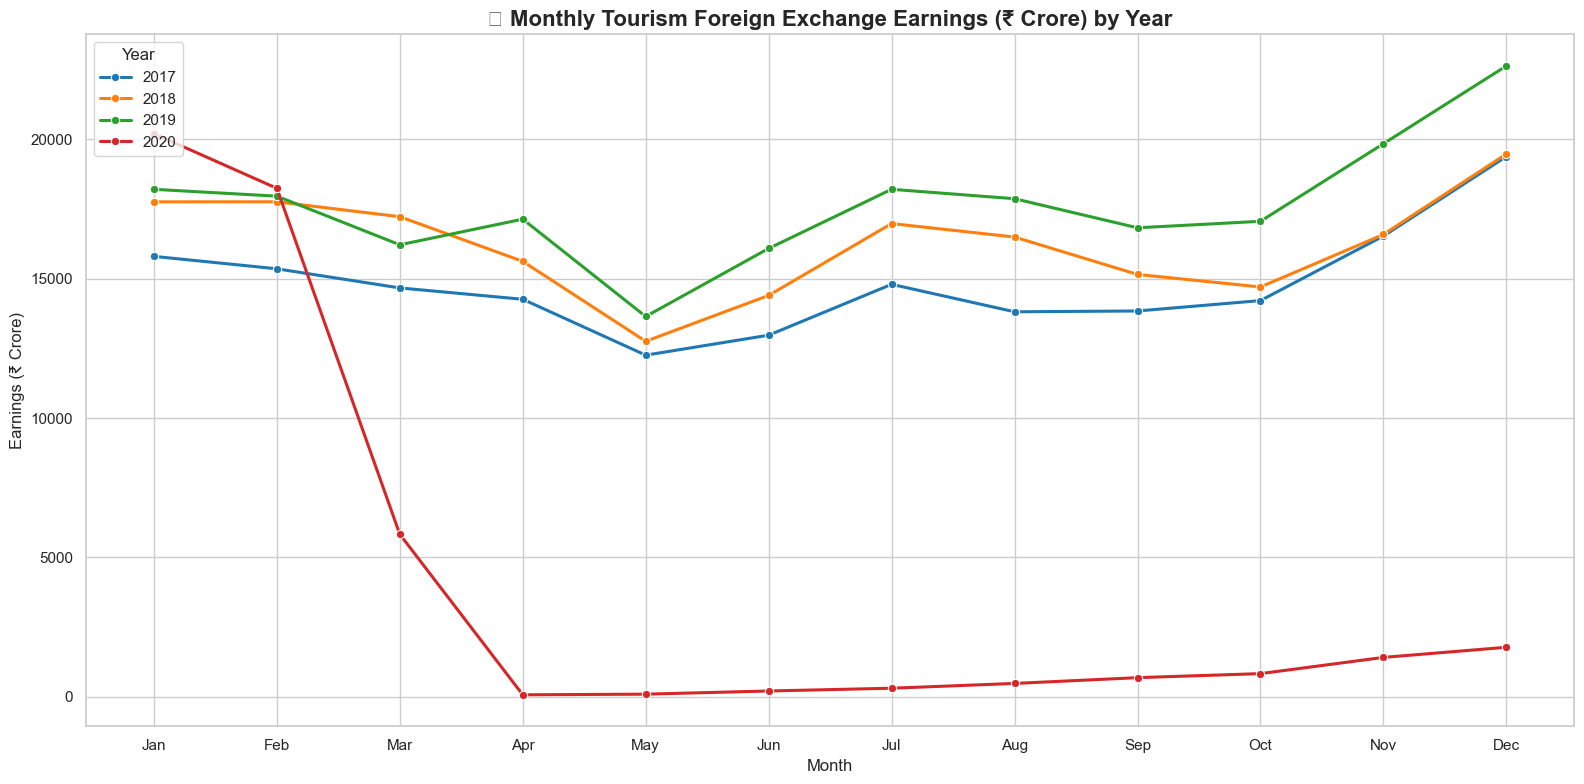

In [ ]:
df_mon_ex=df_monthly_exchange

# Clean column names and rename for clarity
df_mon_ex_clean = df_mon_ex.copy()
df_mon_ex_clean.rename(columns={
    'Foreign exchange earnings from tourism Rupees in Crore': 'FEE_Crore',
    'Month': 'MonthYear'
}, inplace=True)

# Convert earnings to numeric and MonthYear to datetime
df_mon_ex_clean['FEE_Crore'] = pd.to_numeric(df_mon_ex_clean['FEE_Crore'].astype(str).str.strip(), errors='coerce')
df_mon_ex_clean['MonthYear'] = pd.to_datetime(df_mon_ex_clean['MonthYear'], format='%b-%Y', errors='coerce')

# Drop rows with invalid values
df_mon_ex_clean.dropna(subset=['MonthYear', 'FEE_Crore'], inplace=True)
df_mon_ex_clean.sort_values('MonthYear', inplace=True)

# Create Month-Year labels for clearer x-axis
df_mon_ex_clean['MonthLabel'] = df_mon_ex_clean['MonthYear'].dt.strftime('%b-%Y')

# Plot
plt.figure(figsize=(16, 7))
sns.set_style("whitegrid")

sns.lineplot(
    data=df_mon_ex_clean,
    x='MonthLabel',
    y='FEE_Crore',
    marker='o',
    linewidth=2.2,
    color='darkcyan'
)

plt.title("Month-wise Foreign Exchange Earnings from Tourism in India", fontsize=16, weight='bold')
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Earnings (₹ Crore)", fontsize=12)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.grid(True)
plt.show()


# Add Month and Year columns
df_mon_ex_clean['Month'] = df_mon_ex_clean['MonthYear'].dt.strftime('%b')
df_mon_ex_clean['Year'] = df_mon_ex_clean['MonthYear'].dt.year

# Set month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

sns.lineplot(
    data=df_mon_ex_clean,
    x='Month',
    y='FEE_Crore',
    hue='Year',
    marker='o',
    linewidth=2.2,
    palette='tab10',
    hue_order=sorted(df_mon_ex_clean['Year'].unique())
)

plt.title("📈 Monthly Tourism Foreign Exchange Earnings (₹ Crore) by Year", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Earnings (₹ Crore)", fontsize=12)
plt.xticks(ticks=range(12), labels=month_order)
plt.legend(title='Year', loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

Month wise Indian Nationals Departures

In [ ]:
df_mon_ind_dep=df_monthly_indian_departures

Number of Domestic Tourist Visits to all StatesUTs in India

['Country', 'srcYear', 'DomesticVisits', 'Year']


C:\Users\Sushil Pandit\AppData\Local\Temp\ipykernel_19048\1332545995.py:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sushil Pandit\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


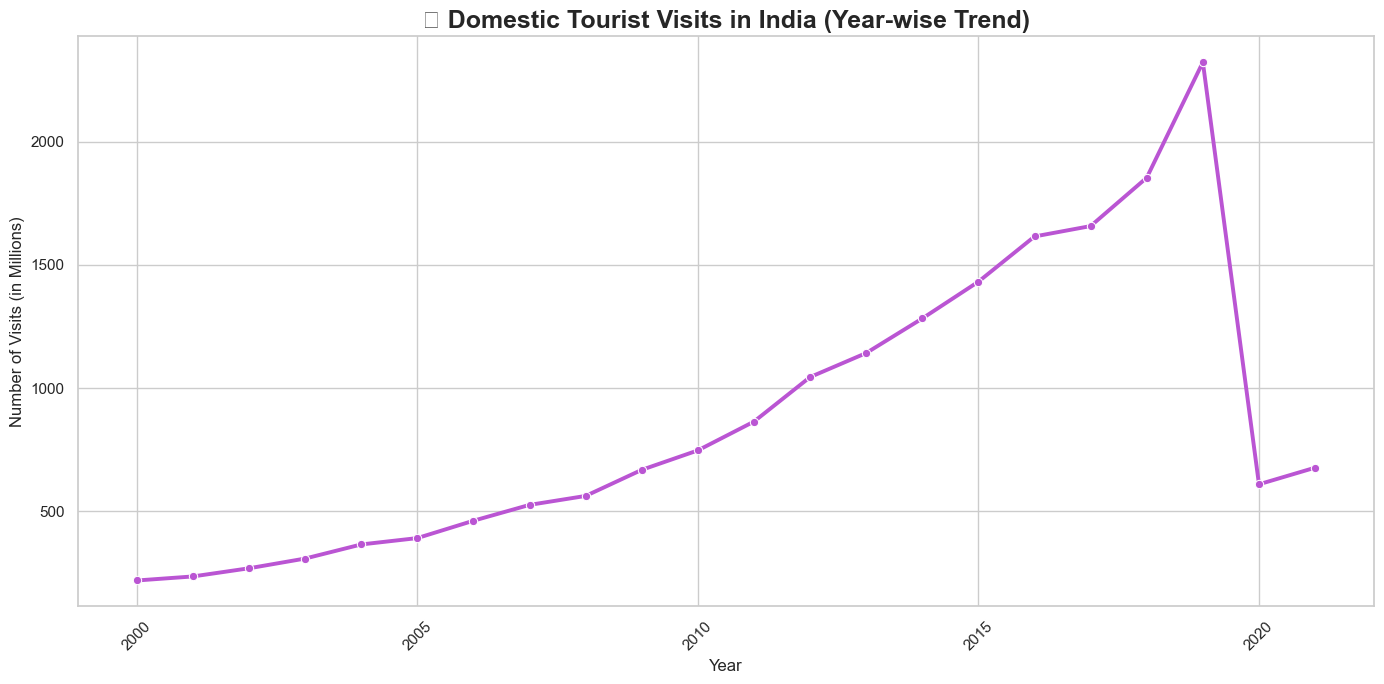

In [60]:
df_dm_vi=df_domestic_visits

print(df_domestic_visits.columns.tolist())



# Drop duplicate column names
df_dm_vi = df_dm_vi.loc[:, ~df_dm_vi.columns.duplicated()]

# Convert columns to numeric
df_dm_vi['Year'] = pd.to_numeric(df_dm_vi['Year'], errors='coerce')
df_dm_vi['DomesticVisits'] = pd.to_numeric(df_dm_vi['DomesticVisits'], errors='coerce')

# Drop missing values and sort by year
df_dm_vi.dropna(subset=['Year', 'DomesticVisits'], inplace=True)
df_dm_vi.sort_values('Year', inplace=True)

# Plot the line chart
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.lineplot(
    data=df_dm_vi,
    x='Year',
    y='DomesticVisits',
    marker='o',
    linewidth=2.8,
    color='mediumorchid' 
)

plt.title("📈 Domestic Tourist Visits in India (Year-wise Trend)", fontsize=18, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Visits (in Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


oreign Tourist Arrivals FTAs and Foreign Exchange Earnings FEE  in India during 2021 with comparative figures

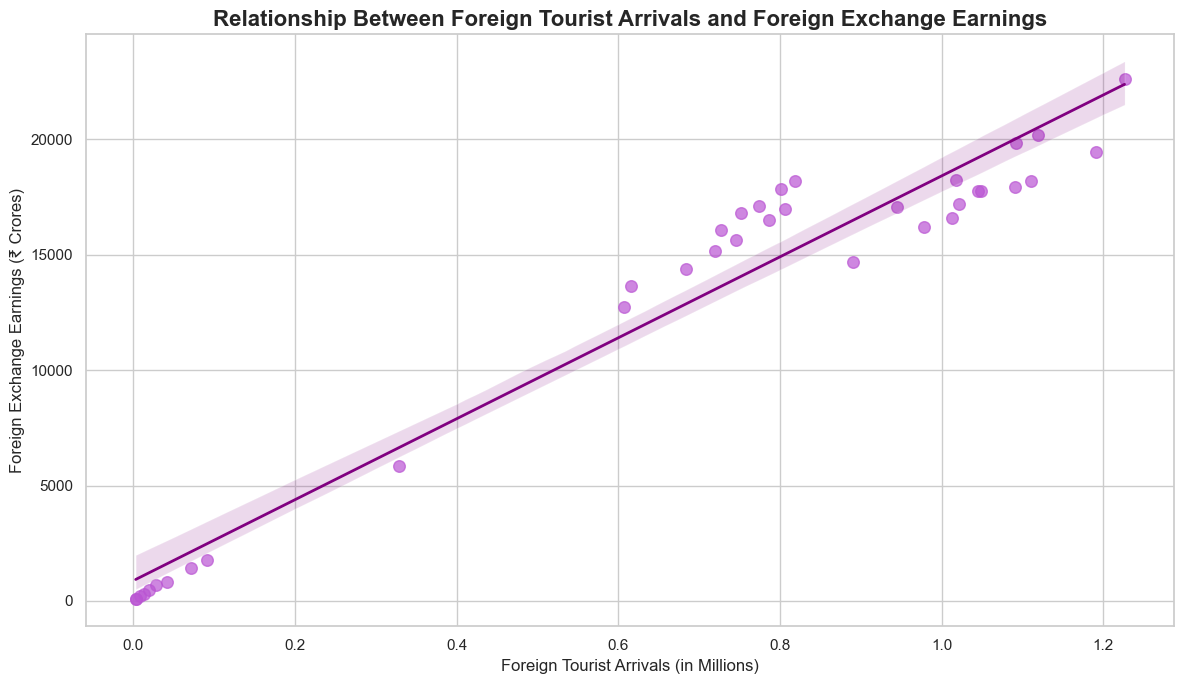

In [ ]:
df_ft_fe_21=df_ftas_fees_2021

# Clean and prepare data
df_ft_fe_21 = df_ft_fe_21.loc[:, ~df_ft_fe_21.columns.duplicated()]

df_ft_fe_21.rename(columns={
    'Foreign Tourist Arrivals (FTA) in India': 'FTA',
    'Foreign Exchange Earnings (FEE) from tourism in India Rs in Crores': 'FEE_INR'
}, inplace=True)

# Convert values to numeric
df_ft_fe_21['FTA'] = pd.to_numeric(df_ft_fe_21['FTA'], errors='coerce')
df_ft_fe_21['FEE_INR'] = pd.to_numeric(df_ft_fe_21['FEE_INR'], errors='coerce')
df_ft_fe_21.dropna(subset=['FTA', 'FEE_INR'], inplace=True)

# Convert FTA to millions
df_ft_fe_21['FTA_Millions'] = df_ft_fe_21['FTA'] / 1_000_000

# Plotting
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

sns.regplot(
    data=df_ft_fe_21,
    x='FTA_Millions',
    y='FEE_INR',
    scatter_kws={'color': 'mediumorchid', 's': 70, 'alpha': 0.7},
    line_kws={'color': 'purple', 'lw': 2},
)

plt.title("Relationship Between Foreign Tourist Arrivals and Foreign Exchange Earnings", fontsize=16, weight='bold')
plt.xlabel("Foreign Tourist Arrivals (in Millions)", fontsize=12)
plt.ylabel("Foreign Exchange Earnings (₹ Crores)", fontsize=12)
plt.tight_layout()
plt.grid(True)
plt.show()

Purpose wise Indian Nationals  Departure IND

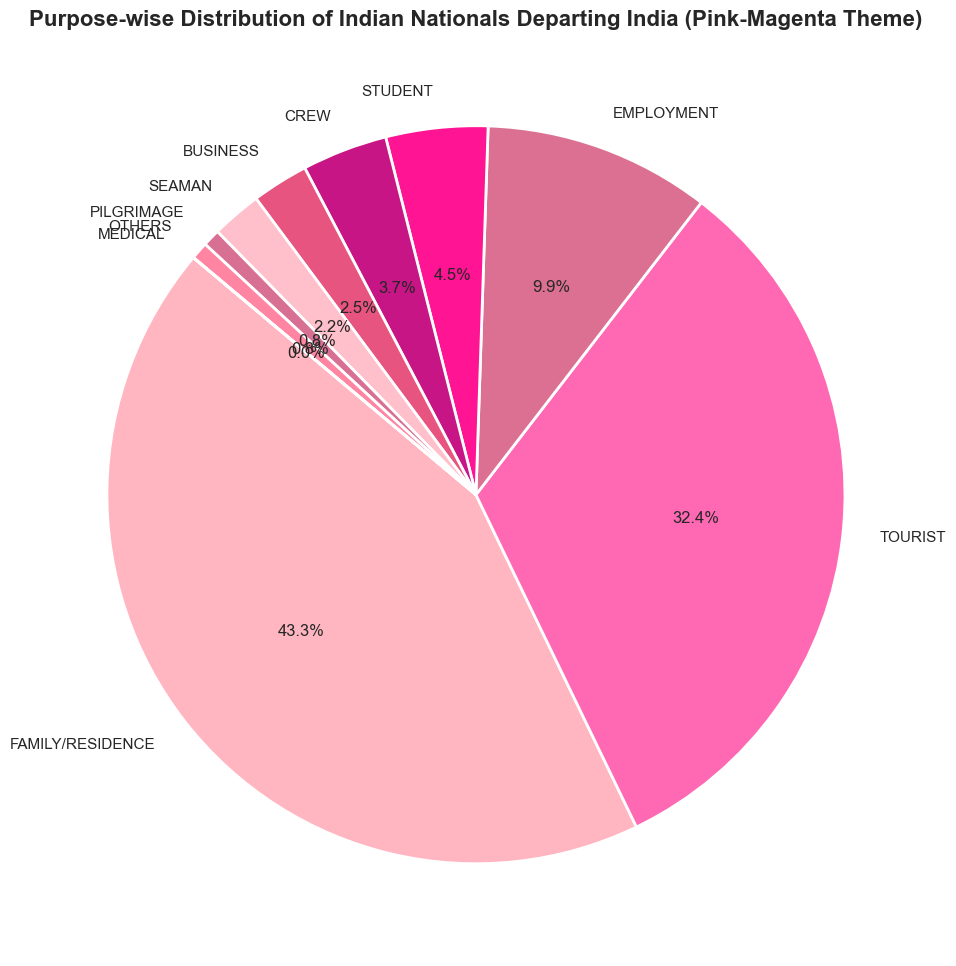

In [63]:
df_dept_purp=df_departure_purpose

# Rename columns for clarity
df_dept_purp.rename(columns={
    'Purpose of Indian Nationals Departure( IND )': 'Purpose',
    'Number of Indian Nationals Departure ( IND )': 'Departures'
}, inplace=True)

# Group similar categories to reduce overlap
category_map = {
    'HAJ / UMRA': 'PILGRIMAGE',
    'RESIDENCE / RE-ENTRY': 'FAMILY/RESIDENCE',
    'FAMILY JOINING / DEPENDENT': 'FAMILY/RESIDENCE',
    'VISIT': 'TOURIST',
    'LOW PROFILE VISITOR TO POE': 'OTHERS',
    'THIRD COUNTRY QUSTSNYINR': 'OTHERS'
}

df_dept_purp['Purpose_Grouped'] = df_dept_purp['Purpose'].replace(category_map)

# Aggregate the grouped data
purpose_grouped = df_dept_purp.groupby('Purpose_Grouped')['Departures'].sum().sort_values(ascending=False)

# Define a custom pink-magenta color palette
custom_colors = [
    "#ffb6c1", "#ff69b4", "#db7093", "#ff1493", "#c71585",
    "#e75480", "#ffc0cb", "#d87093", "#ff85a2", "#fc5a8d"
]

# Match number of colors to number of categories
custom_colors = custom_colors[:len(purpose_grouped)]

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    purpose_grouped,
    labels=purpose_grouped.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

plt.title('Purpose-wise Distribution of Indian Nationals Departing India (Pink-Magenta Theme)', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

Share of Top 10 StatesUTs of India in Number of Domestic Tourist Visits

C:\Users\Sushil Pandit\AppData\Local\Temp\ipykernel_19048\3169043325.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


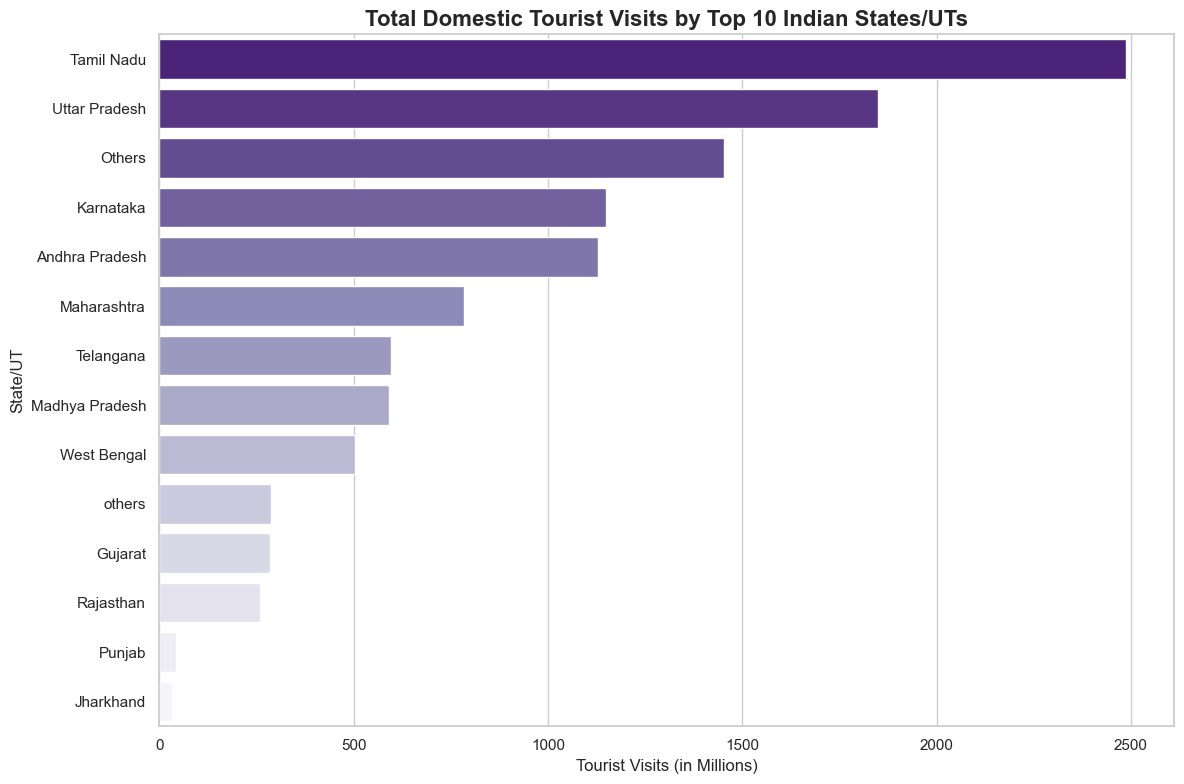

In [64]:
df_tp10_dmstc=df_top10_domestic
df_tp10_dmstc.columns = df_tp10_dmstc.columns.str.strip()

# Group by State and calculate total visits
df_grouped = df_tp10_dmstc.groupby('srcStateName')['Number of Domestic Tourist Visits'].sum().sort_values(ascending=False).reset_index()

# Convert visits to millions
df_grouped['Visits (in Millions)'] = df_grouped['Number of Domestic Tourist Visits'] / 1_000_000

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_grouped,
    x='Visits (in Millions)',
    y='srcStateName',
    palette='Purples_r'
)

# Add labels and title
plt.title('Total Domestic Tourist Visits by Top 10 Indian States/UTs', fontsize=16, weight='bold')
plt.xlabel('Tourist Visits (in Millions)')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()

Share of Top 10 StatesUTs of India in Number of Foreign Tourist Visits

C:\Users\Sushil Pandit\AppData\Local\Temp\ipykernel_19048\3874526175.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


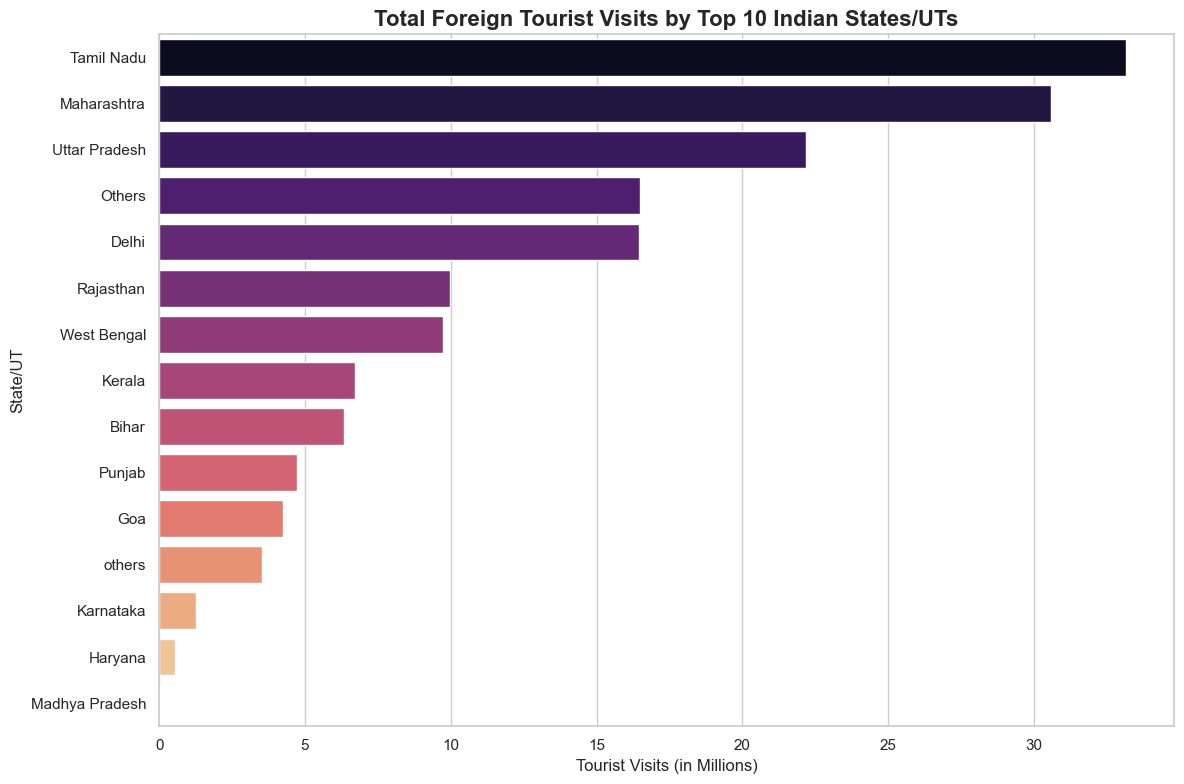

In [65]:
df_tp10_frgn=df_top10_foreign

df_tp10_frgn.columns = df_tp10_frgn.columns.str.strip()

# Group by state and sum the number of foreign tourist visits
df_foreign_grouped = df_tp10_frgn.groupby('srcStateName')[
    'Number of foreign tourist visiting from each state'
].sum().sort_values(ascending=False).reset_index()

# Convert visits to millions
df_foreign_grouped['Visits (in Millions)'] = df_foreign_grouped['Number of foreign tourist visiting from each state'] / 1_000_000

# Plot the histogram-style bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_foreign_grouped,
    x='Visits (in Millions)',
    y='srcStateName',
    palette='magma'
)

# Add title and labels
plt.title('Total Foreign Tourist Visits by Top 10 Indian States/UTs', fontsize=16, weight='bold')
plt.xlabel('Tourist Visits (in Millions)')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()

Top 10 destination country for Indian Nationals Departures  IND

C:\Users\Sushil Pandit\AppData\Local\Temp\ipykernel_19048\2038292144.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


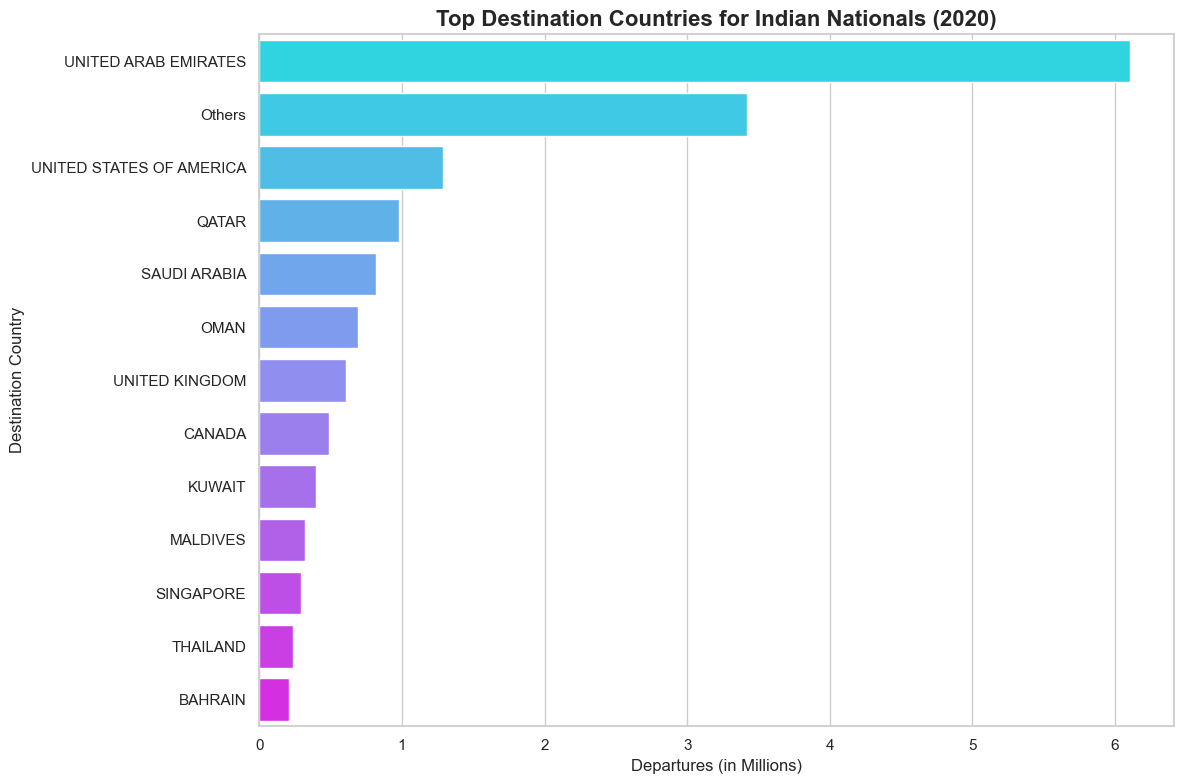

In [66]:
df_tp10_dep_cnt=df_top10_departure_countries

df_tp10_dep_cnt.columns = df_tp10_dep_cnt.columns.str.strip()

# Group and sort by destination country
df_dest_grouped = df_tp10_dep_cnt.groupby('Destination Country')[
    'Number of Indian Nationals Departures (IND)'
].sum().sort_values(ascending=False).reset_index()

# Convert departures to millions
df_dest_grouped['Departures (in Millions)'] = df_dest_grouped['Number of Indian Nationals Departures (IND)'] / 1_000_000

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_dest_grouped,
    x='Departures (in Millions)',
    y='Destination Country',
    palette='cool'
)

# Chart labels and title
plt.title('Top Destination Countries for Indian Nationals (2020)', fontsize=16, weight='bold')
plt.xlabel('Departures (in Millions)')
plt.ylabel('Destination Country')
plt.tight_layout()
plt.show()

Visitor Profiling Tables

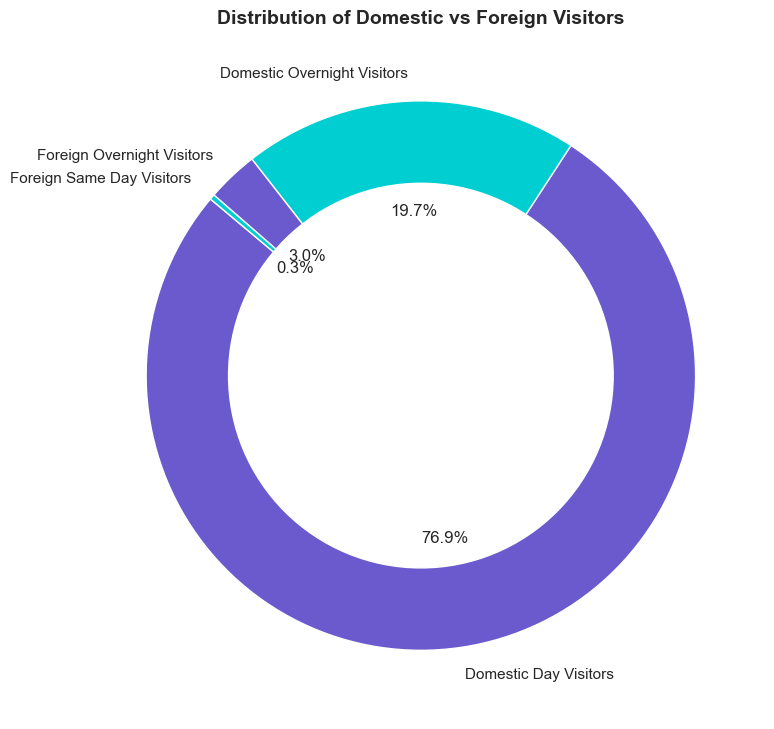

In [67]:
df_vis_prf=df_visitor_profiling

df_vis_prf.columns = df_vis_prf.columns.str.strip()

# Group by visitor type and sum the number of visitors
visitor_type_summary = df_vis_prf.groupby('Type of visitors includes domestic or foreign')[
    'Number of overnight and day visitors'
].sum().reset_index()

# Plotting the donut chart
plt.figure(figsize=(8, 8))
colors = ['#6A5ACD', '#00CED1']  # SlateBlue and DarkTurquoise
wedges, texts, autotexts = plt.pie(
    visitor_type_summary['Number of overnight and day visitors'],
    labels=visitor_type_summary['Type of visitors includes domestic or foreign'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)

# Add a white circle in the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Chart title and layout
plt.title('Distribution of Domestic vs Foreign Visitors', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

Visitor Survey at Tourism Destinations

C:\Users\Sushil Pandit\AppData\Local\Temp\ipykernel_19048\3894005821.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


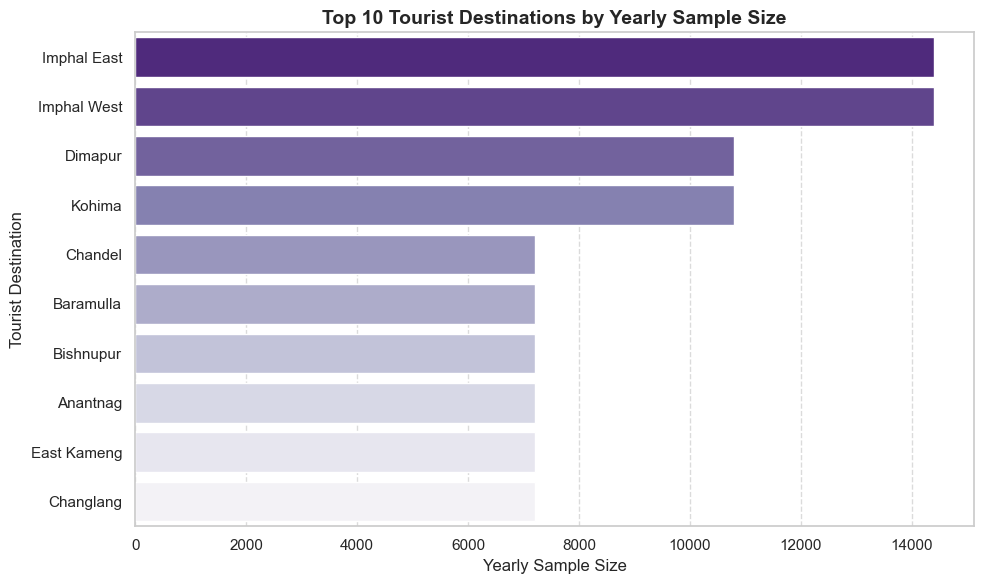

In [68]:
df_vis_srvy=df_visitor_survey

df_vis_srvy.columns = df_vis_srvy.columns.str.strip()

# Group and sort the top 10 destinations based on sample size
top_dest_sample = df_vis_srvy.groupby('Tourist Destination')['Sample Size Yearly'].sum().reset_index()
top_dest_sample = top_dest_sample.sort_values(by='Sample Size Yearly', ascending=False).head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_dest_sample,
    y='Tourist Destination',
    x='Sample Size Yearly',
    palette='Purples_r'  # A beautiful purple gradient
)

# Styling
plt.title("Top 10 Tourist Destinations by Yearly Sample Size", fontsize=14, weight='bold')
plt.xlabel("Yearly Sample Size")
plt.ylabel("Tourist Destination")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()